            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


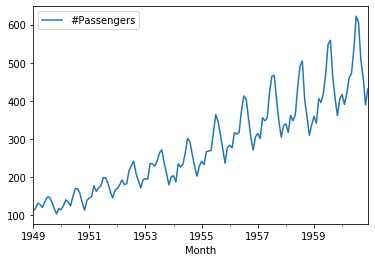

In [12]:
from pandas import Series
import pandas as pd
import numpy as np
from matplotlib import pyplot
##d= pd.read_csv('Data1\\Data1\\section 5\\AirPassengers.csv', header=0)
dateparse = lambda dates : pd.datetime.strptime(dates, '%Y-%m')
d = pd.read_csv('Data1\\Data1\\section 5\\AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)
print(d.head())
d.plot()
pyplot.show()

In [14]:
values = pd.DataFrame(d.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

In [15]:
dataframe.head()

,t-1,t+1
0,NaN,112
1,112.0,118
2,118.0,132
3,132.0,129
4,129.0,121


In [27]:
#split into train and test
X = dataframe.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
train_X, train_Y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [21]:
#persistence model
predictions = [x for x in test_X]

In [22]:
#calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]

In [23]:
from statsmodels.tsa.ar_model import AR

In [28]:
#persistence model on training set
train_pred = [x for x in train_X]
#calculate residual
train_resid = [train_Y[i]-train_pred[i] for i in range(len(train_pred))]

In [29]:
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=12, Coef=[ 7.03500675 -0.15683351 -0.25209852 -0.16896857 -0.28588437 -0.15961097
 -0.27352604 -0.20361598 -0.30260736 -0.19747235 -0.30781092 -0.13615722
  0.76672873]


In [30]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

predicted error=6.018803, expected error=4.000000
predicted error=-14.679702, expected error=-22.000000
predicted error=57.030700, expected error=44.000000
predicted error=-5.542126, expected error=-14.000000
predicted error=20.536394, expected error=15.000000
predicted error=81.090662, expected error=72.000000
predicted error=53.907947, expected error=56.000000
predicted error=6.318911, expected error=14.000000
predicted error=-66.000184, expected error=-101.000000
predicted error=-59.883605, expected error=-45.000000
predicted error=-38.189933, expected error=-49.000000
predicted error=32.984918, expected error=27.000000
predicted error=10.163070, expected error=23.000000
predicted error=-24.645131, expected error=-18.000000
predicted error=45.325007, expected error=64.000000
predicted error=-19.608797, expected error=-10.000000
predicted error=19.450059, expected error=24.000000
predicted error=75.877195, expected error=52.000000
predicted error=63.140179, expected error=76.000000
p

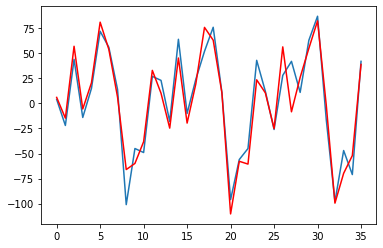

In [31]:
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()